<a href="https://colab.research.google.com/github/amspsingh04/100_days_ML/blob/main/100days_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train model
5. Evaluate the model/model selection
6. Deploy the model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df=df.iloc[:,1:]

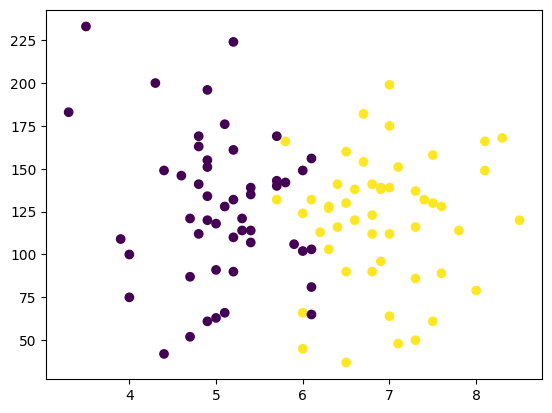

In [ ]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

Extracting Input and Output cols

In [ ]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]
print(x)
print(y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Model training

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
#model train
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#model evaluation
predictions = clf.predict(X_test)

In [ ]:
print(np.array(Y_test))

[0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.85

Visualising pattern using decision boundary

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

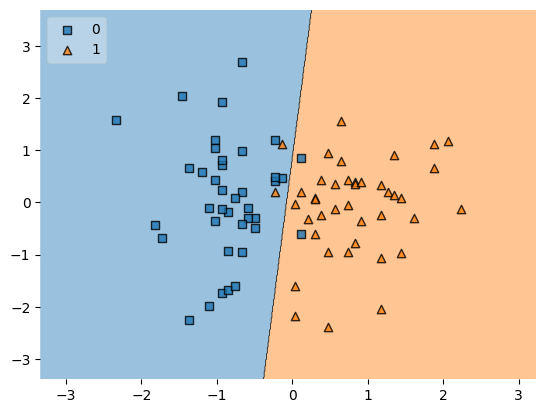

In [ ]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))